In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Paths towards the JSON outputs ###
path_call_quanto = "C:\\Users\\Zachary\\Documents\\3A\\pricer-multi-devises\\data\\call_quanto_portfolio.json"
path_call_currency = "C:\\Users\\Zachary\\Documents\\3A\\pricer-multi-devises\\data\\call_currency_portfolio.json"
path_foreign_asian = "C:\\Users\\Zachary\\Documents\\3A\\pricer-multi-devises\\data\\foreign_asian_portfolio.json"
path_quanto_exchange = "C:\\Users\\Zachary\\Documents\\3A\\pricer-multi-devises\\data\\quanto_exchange_portfolio.json"
path_foreign_perf_basket = "C:\\Users\\Zachary\\Documents\\3A\\pricer-multi-devises\\data\\foreign_perf_basket_portfolio.json"

### Creation of the DataFrames for analysis ###

# Call quanto
df_call_quanto = pd.read_json(path_call_quanto)
df_call_quanto = df_call_quanto.set_index(df_call_quanto["date"])
df_call_quanto.drop(["date"], axis=1, inplace=True)

# Call currency
df_call_currency = pd.read_json(path_call_currency)
df_call_currency = df_call_currency.set_index(df_call_currency["date"])
df_call_currency.drop(["date"], axis=1, inplace=True)

# Foreign Asian
df_foreign_asian = pd.read_json(path_foreign_asian)
df_foreign_asian = df_foreign_asian.set_index(df_foreign_asian["date"])
df_foreign_asian.drop(["date"], axis=1, inplace=True)
                      
# Quanto exchange
df_quanto_exchange = pd.read_json(path_quanto_exchange)
df_quanto_exchange = df_quanto_exchange.set_index(df_quanto_exchange["date"])
df_quanto_exchange.drop(["date"], axis=1, inplace=True)

# FOreign perf basket
df_foreign_perf = pd.read_json(path_foreign_perf_basket)
df_foreign_perf = df_foreign_perf.set_index(df_foreign_perf["date"])
df_foreign_perf.drop(["date"], axis=1, inplace=True)


# Couverture du call quanto

In [2]:
df_call_quanto.head()

,deltas,deltasStdDev,price,priceStdDev,value
date,,,,,
0,"[0.6804179468562791, 0.0]","[0.003465235102701, 0.0]",2.716658,0.021665,2.716658
1,"[0.6539091780721651, 0.0]","[0.0034672353215200002, 0.0]",2.470558,0.020284,2.490390
2,"[0.6549232402749391, 0.0]","[0.003473861999246, 0.0]",2.450069,0.020277,2.462198
3,"[0.651102122063957, 0.0]","[0.003482125924478, 0.0]",2.398395,0.019859,2.388447
4,"[0.6211003524468931, 0.0]","[0.0035230979467500002, 0.0]",2.154032,0.018951,2.134704


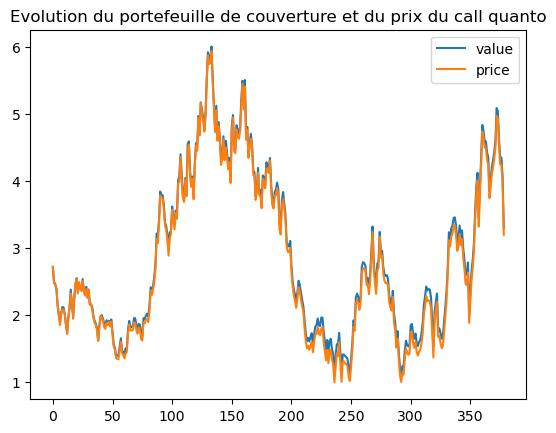

In [3]:
plt.title("Evolution du portefeuille de couverture et du prix du call quanto")
plt.plot(df_call_quanto["value"], label = 'value')
plt.plot(df_call_quanto["price"], label='price')
plt.legend()

In [4]:
price = np.array(df_call_quanto["price"])
value = np.array(df_call_quanto["value"])
tracking_error_call_quanto = (price - value) / value

# Couverture du call currency

In [5]:
df_call_currency.head()

,deltas,deltasStdDev,price,priceStdDev,value
date,,,,,
0,[0.5270737513474331],[0.001697417749021],6.017826,0.029594,6.017826
1,[0.49499542131496405],[0.0016986394873390002],5.409203,0.028029,5.425021
2,[0.49209057308221704],[0.001697042011318],5.299998,0.027473,5.317939
3,[0.516761012516309],[0.0016978745905020002],5.782308,0.028765,5.799722
4,[0.508223290608395],[0.001694305368352],5.547267,0.028076,5.670327


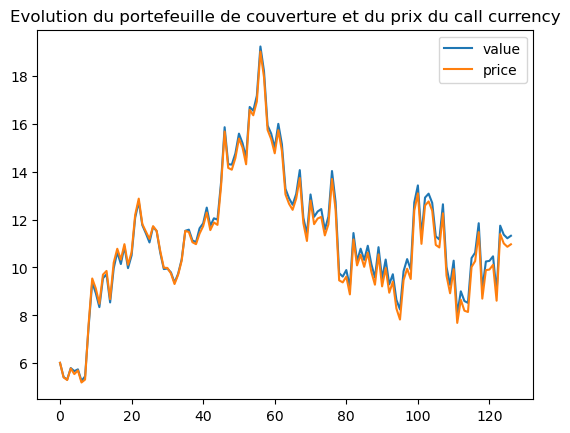

In [6]:
plt.title("Evolution du portefeuille de couverture et du prix du call currency")
plt.plot(df_call_currency["value"], label = 'value')
plt.plot(df_call_currency["price"], label='price')
plt.legend()

In [7]:
price = np.array(df_call_currency["price"])
value = np.array(df_call_currency["value"])
tracking_error_call_currency = (price - value) / value

# Couverture du foreign asian

In [8]:
df_foreign_asian.head()

,deltas,deltasStdDev,price,priceStdDev,value
date,,,,,
0,"[-0.610402062889091, 0.687143281939631, 0.0]","[0.0019626922372890003, 0.002415126965151, 0.0]",1.446984,0.008477,1.446984
1,"[-0.611764804911034, 0.7115185100534921, 0.0]","[0.002053901729575, 0.002637307215093, 0.0]",1.696742,0.010341,1.472025
2,"[-0.594949464788161, 0.6967337987681821, 0.0]","[0.002062560852837, 0.002652957095075, 0.0]",1.606282,0.009949,1.377997
3,"[-0.564932202797995, 0.66693078432712, 0.0]","[0.002067159638334, 0.0026693914341750003, 0.0]",1.426493,0.009275,1.215512
4,"[-0.5800659737350611, 0.679886346674165, 0.0]","[0.002063836635389, 0.002651450135155, 0.0]",1.480621,0.009419,1.277935


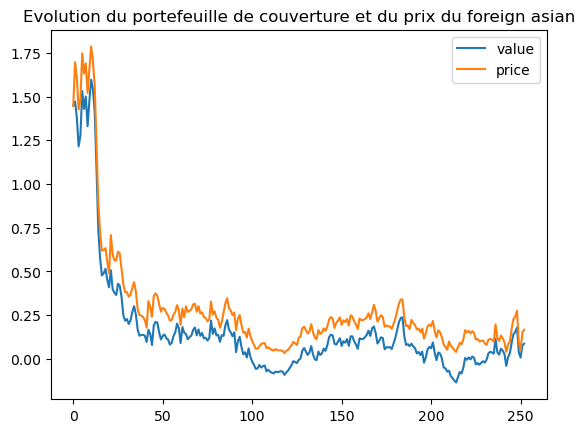

In [9]:
plt.title("Evolution du portefeuille de couverture et du prix du foreign asian")
plt.plot(df_foreign_asian["value"], label = 'value')
plt.plot(df_foreign_asian["price"], label='price')
plt.legend()

In [10]:
price = np.array(df_foreign_asian["price"])
value = np.array(df_foreign_asian["value"])
tracking_error_foreign_asian = (price - value) / value

# Couverture du quanto exchange

In [11]:
df_quanto_exchange.head()

,deltas,deltasStdDev,price,priceStdDev,value
date,,,,,
0,"[0.569385026772539, -0.43282538403595605, 0.0]","[0.002312131389092, 0.002060312215104, 0.0]",0.973147,0.006348,0.973147
1,"[0.5777766342473261, -0.44064963070411506, 0.0]","[0.002303753064393, 0.0020714426940550003, 0.0]",0.994352,0.006373,0.996591
2,"[0.5832066853473901, -0.44794414634336505, 0.0]","[0.0023099023910350003, 0.002091956413576, 0.0]",1.013635,0.006486,1.015383
3,"[0.6211047056076171, -0.48868961874805206, 0.0]","[0.002292480942559, 0.002162571610854, 0.0]",1.115936,0.006669,1.114668
4,"[0.6336521835423681, -0.5024903307347101, 0.0]","[0.002275602175701, 0.0021654111446060002, 0.0]",1.165771,0.006849,1.167558


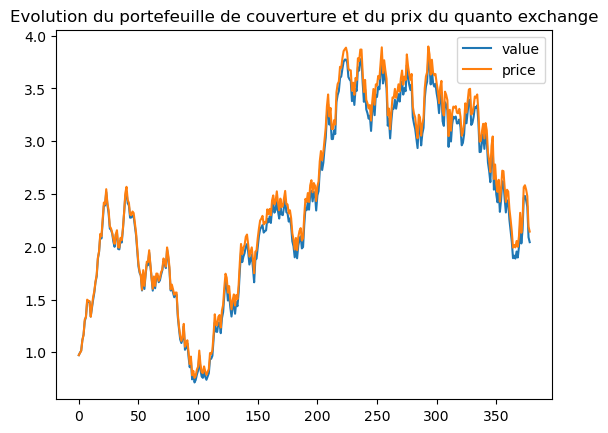

In [12]:
plt.title("Evolution du portefeuille de couverture et du prix du quanto exchange")
plt.plot(df_quanto_exchange["value"], label = 'value')
plt.plot(df_quanto_exchange["price"], label='price')
plt.legend()

In [13]:
price = np.array(df_quanto_exchange["price"])
value = np.array(df_quanto_exchange["value"])
tracking_error_quanto_exchange = (price - value) / value

# Foreign perf basket

In [14]:
df_foreign_perf.head()

,deltas,deltasStdDev,price,priceStdDev,value
date,,,,,
0,"[-0.738336834045048, 0.17213214587411402, 0.14...","[0.001956781054393, 0.0014758619549320002, 0.0...",1.469561,0.007432,1.469561
1,"[-0.732181695457878, 0.419067695247733, 0.3601...","[0.002159279988052, 0.005718738912894, 0.00534...",2.032953,0.011583,1.494723
2,"[-0.7469493362663241, 0.354209046860513, 0.295...","[0.002129105041848, 0.005571470416581001, 0.00...",2.058841,0.011231,1.423083
3,"[-0.7785892102507781, 0.328092501538069, 0.271...","[0.002071508340185, 0.005507307857392001, 0.00...",2.267495,0.011587,1.655415
4,"[-0.7755524453158421, 0.273523521980707, 0.214...","[0.002109739361993, 0.005575337447243, 0.00527...",2.263847,0.011607,1.611493


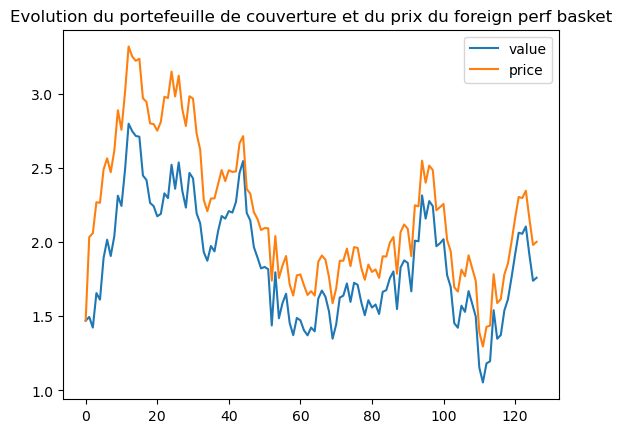

In [15]:
plt.title("Evolution du portefeuille de couverture et du prix du foreign perf basket")
plt.plot(df_foreign_perf["value"], label = 'value')
plt.plot(df_foreign_perf["price"], label='price')
plt.legend()

In [16]:
price = np.array(df_foreign_perf["price"])
value = np.array(df_foreign_perf["value"])
tracking_error_foreign_perf_basket = (price - value) / value

# tracking error pour les différents portefeuilles 

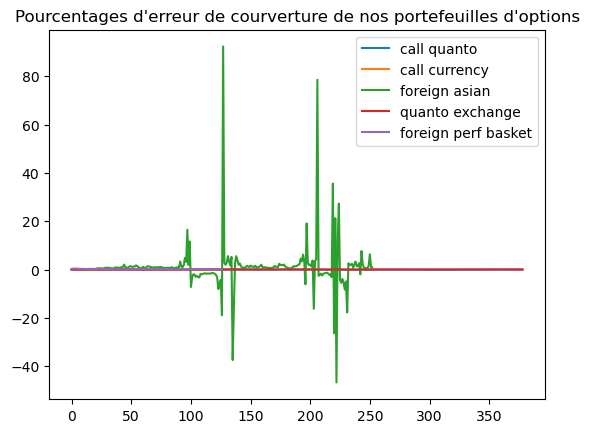

In [19]:
plt.title("Pourcentages d'erreur de courverture de nos portefeuilles d'options")
plt.plot(tracking_error_call_quanto, label = 'call quanto')
plt.plot(tracking_error_call_currency, label = 'call currency')
# plt.plot(tracking_error_foreign_asian, label = 'foreign asian')
plt.plot(tracking_error_quanto_exchange, label = 'quanto exchange')
plt.plot(tracking_error_foreign_perf_basket, label = 'foreign perf basket')
plt.legend()

On ne peut pas afficher la couverture de l'option foreign asian avec les autres courbes car notre erreur sur ce produit est bien plus grande que pour les autres portefeuilles de couverture. La courbe d'erreur relative est donnée ci-dessous : 

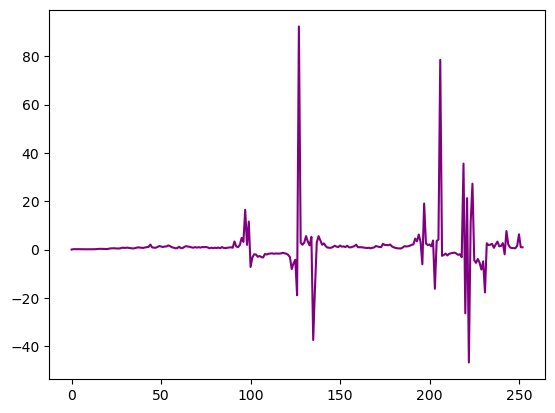

In [20]:
plt.plot(tracking_error_foreign_asian, c='purple')